# Dataset and cleaning 


The first part is to load the data into pandas data frame and explore the data for irregularities.
The focus is on the following 
- Missing Data
- Outliers 
- Correlation


In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
data = pd.read_csv("./AQI2014-2020.csv", na_values = "NaN", index_col=[0], parse_dates=['Date'], date_parser = pd.to_datetime )

In [2]:
#inspect that dataset 
data.head()


,Site ID,Daily Mean PM2.5 Concentration,UNITS,DAILY_AQI_VALUE,Site Name,STATE_CODE,STATE,COUNTY,SITE_LATITUDE,SITE_LONGITUDE,POC
Date,,,,,,,,,,,
2014-01-01,170310001,10.9,ug/m3 LC,45,VILLAGE GARAGE,17,Illinois,Cook,41.670992,-87.732457,1
2014-01-01,170310057,8.4,ug/m3 LC,35,SPRINGFIELD PUMP STATION,17,Illinois,Cook,41.912739,-87.722673,1
2014-01-01,170310076,6.1,ug/m3 LC,25,COM ED MAINTENANCE BLDG,17,Illinois,Cook,41.751400,-87.713488,1
2014-01-01,170314201,7.6,ug/m3 LC,32,NORTHBROOK WATER PLANT,17,Illinois,Cook,42.139996,-87.799227,1
2014-01-01,170316005,8.3,ug/m3 LC,35,LIBERTY SCHOOL,17,Illinois,Cook,41.864426,-87.748902,1


In [3]:
data.tail()

,Site ID,Daily Mean PM2.5 Concentration,UNITS,DAILY_AQI_VALUE,Site Name,STATE_CODE,STATE,COUNTY,SITE_LATITUDE,SITE_LONGITUDE,POC
Date,,,,,,,,,,,
2020-12-31,170310076,11.2,ug/m3 LC,47,COM ED MAINTENANCE BLDG,17,Illinois,Cook,41.751400,-87.713488,1
2020-12-31,170310119,15.5,ug/m3 LC,58,Kingery Near Road #1,17,Illinois,Cook,41.578620,-87.557406,2
2020-12-31,170314007,16.9,ug/m3 LC,61,REGIONAL OFFICE BUILDING,17,Illinois,Cook,42.060285,-87.863225,2
2020-12-31,170316005,13.6,ug/m3 LC,54,LIBERTY SCHOOL,17,Illinois,Cook,41.864426,-87.748902,2
2020-12-31,170316005,11.6,ug/m3 LC,48,LIBERTY SCHOOL,17,Illinois,Cook,41.864426,-87.748902,1


In [4]:
#inspect the columns 
data.columns

Index(['Site ID', 'Daily Mean PM2.5 Concentration', 'UNITS', 'DAILY_AQI_VALUE',
       'Site Name', 'STATE_CODE', 'STATE', 'COUNTY', 'SITE_LATITUDE',
       'SITE_LONGITUDE', 'POC'],
      dtype='object')

In [5]:
#shape of the data
data.shape

(20545, 11)

In [6]:
#dataframe information 
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20545 entries, 2014-01-01 to 2020-12-31
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Site ID                         20545 non-null  int64  
 1   Daily Mean PM2.5 Concentration  20545 non-null  float64
 2   UNITS                           20545 non-null  object 
 3   DAILY_AQI_VALUE                 20545 non-null  int64  
 4   Site Name                       20545 non-null  object 
 5   STATE_CODE                      20545 non-null  int64  
 6   STATE                           20545 non-null  object 
 7   COUNTY                          20545 non-null  object 
 8   SITE_LATITUDE                   20545 non-null  float64
 9   SITE_LONGITUDE                  20545 non-null  float64
 10  POC                             20545 non-null  int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 1.9+ MB


In [7]:
data.POC.unique()

array([1, 2, 3, 4], dtype=int64)

In [8]:
data.dtypes

Site ID                             int64
Daily Mean PM2.5 Concentration    float64
UNITS                              object
DAILY_AQI_VALUE                     int64
Site Name                          object
STATE_CODE                          int64
STATE                              object
COUNTY                             object
SITE_LATITUDE                     float64
SITE_LONGITUDE                    float64
POC                                 int64
dtype: object

In [9]:
#Drop object type data as they will not be considered by the correlation algorithm
data = data.select_dtypes(exclude=['object'])
print(data)

              Site ID  Daily Mean PM2.5 Concentration  DAILY_AQI_VALUE  \
Date                                                                     
2014-01-01  170310001                            10.9               45   
2014-01-01  170310057                             8.4               35   
2014-01-01  170310076                             6.1               25   
2014-01-01  170314201                             7.6               32   
2014-01-01  170316005                             8.3               35   
...               ...                             ...              ...   
2020-12-31  170310076                            11.2               47   
2020-12-31  170310119                            15.5               58   
2020-12-31  170314007                            16.9               61   
2020-12-31  170316005                            13.6               54   
2020-12-31  170316005                            11.6               48   

            STATE_CODE  SITE_LATITUDE

In [10]:
#drop the state code as it it wont show any correlation
data.drop(['STATE_CODE'], axis=1, inplace=True)

In [11]:
data.head()

,Site ID,Daily Mean PM2.5 Concentration,DAILY_AQI_VALUE,SITE_LATITUDE,SITE_LONGITUDE,POC
Date,,,,,,
2014-01-01,170310001,10.9,45,41.670992,-87.732457,1
2014-01-01,170310057,8.4,35,41.912739,-87.722673,1
2014-01-01,170310076,6.1,25,41.751400,-87.713488,1
2014-01-01,170314201,7.6,32,42.139996,-87.799227,1
2014-01-01,170316005,8.3,35,41.864426,-87.748902,1


In [12]:
#Statistical data Description
data.describe()

,Site ID,Daily Mean PM2.5 Concentration,DAILY_AQI_VALUE,SITE_LATITUDE,SITE_LONGITUDE,POC
count,2.054500e+04,20545.000000,20545.000000,20545.000000,20545.000000,20545.000000
mean,1.703120e+08,9.556987,37.847213,41.868798,-87.748789,1.253784
std,2.299870e+03,5.192310,16.458756,0.161667,0.078234,0.441516
min,1.703100e+08,-1.300000,0.000000,41.578620,-87.876265,1.000000
25%,1.703101e+08,6.000000,25.000000,41.751400,-87.799227,1.000000
50%,1.703101e+08,8.700000,36.000000,41.864426,-87.748902,1.000000
75%,1.703142e+08,12.100000,51.000000,41.965485,-87.722673,2.000000
max,1.703160e+08,117.800000,183.000000,42.139996,-87.539315,4.000000


In [13]:
#Describing Percentage for each column Total Missing Values in the Datasets
data.isnull().sum() * 100 / len(data)

Site ID                           0.0
Daily Mean PM2.5 Concentration    0.0
DAILY_AQI_VALUE                   0.0
SITE_LATITUDE                     0.0
SITE_LONGITUDE                    0.0
POC                               0.0
dtype: float64

In [14]:
# Confirm NaN Values Drop and Clean Dataset 
data = data.dropna()

In [15]:
data.shape

(20545, 6)

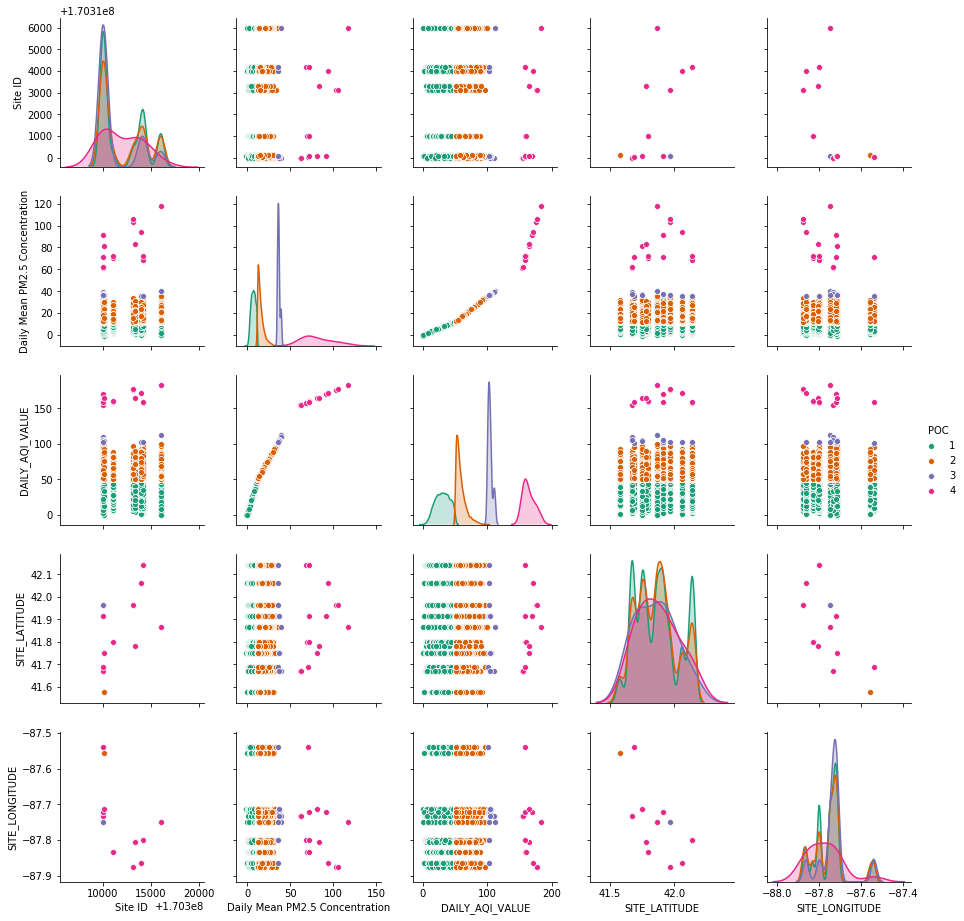

In [16]:
sns.pairplot(data,hue='POC',palette='Dark2')

# 2. Feature selection - correlation 

In [17]:
#feature matrix based on the air quality index table
x_var=data.drop(['POC'], axis=1)
y_var=data['POC']


In [18]:
x_var.head()

,Site ID,Daily Mean PM2.5 Concentration,DAILY_AQI_VALUE,SITE_LATITUDE,SITE_LONGITUDE
Date,,,,,
2014-01-01,170310001,10.9,45,41.670992,-87.732457
2014-01-01,170310057,8.4,35,41.912739,-87.722673
2014-01-01,170310076,6.1,25,41.751400,-87.713488
2014-01-01,170314201,7.6,32,42.139996,-87.799227
2014-01-01,170316005,8.3,35,41.864426,-87.748902


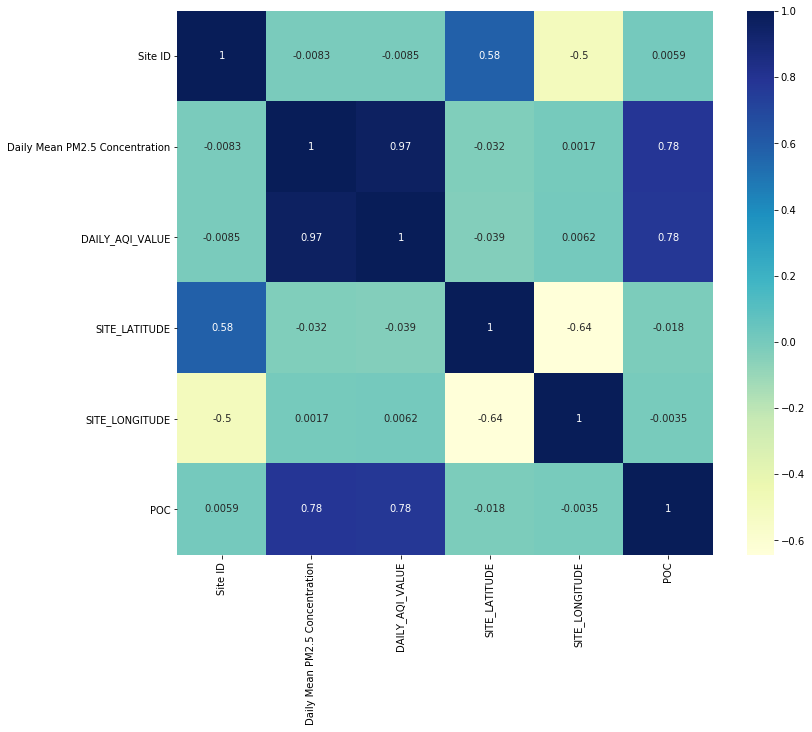

In [21]:
#using pearson correlation with a heatmap
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(12,10))

cor = data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.YlGnBu)
plt.show()

In [22]:
# select the highly correlated features 

def correlation(dataset, threshold):
    col_corr = set() #set all the names of correlated columns 
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j]) > threshold: #the absolute coeff value 
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [24]:
corr_features = correlation(data, 0.7)
len(set(corr_features))


2

In [25]:
corr_features

{'DAILY_AQI_VALUE', 'POC'}